In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

**Iris Dataset**

In [ ]:
df = pd.read_csv('/content/sample_data/iris (1).csv')
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(f"Shape of the DataFrame: {df.shape}")

print("\nDescriptive statistics:")
display(df.describe())

print("\nTarget variable: species")

print("\nMissing values per column:")
display(df.isnull().sum())

print("\nDistribution of the target variable:")
display(df['species'].value_counts())

Shape of the DataFrame: (150, 5)

Descriptive statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Target variable: species

Missing values per column:


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0



Distribution of the target variable:


,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


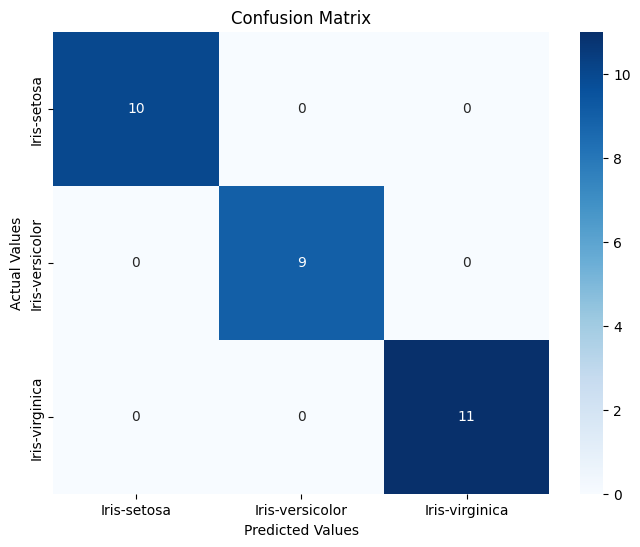

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                     columns=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')  # Use 'Blues' for blue colormap
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**Drug Dataset**

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/sample_data/drug.csv')
display(df1.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
print("Shape of the data:", df1.shape)

print("\nData types of each column:\n", df1.dtypes)

print("\nDistribution of the target variable (Drug):\n", df1['Drug'].value_counts())

print("\nDescriptive statistics for numerical features:\n", df1.describe())

print("\nNumber of missing values in each column:\n", df1.isnull().sum())

Shape of the data: (200, 6)

Data types of each column:
 Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Distribution of the target variable (Drug):
 Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

Descriptive statistics for numerical features:
               Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

Number of missing values in each column:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()

df1['Sex'] = le_sex.fit_transform(df1['Sex'])
df1['BP'] = le_bp.fit_transform(df1['BP'])
df1['Cholesterol'] = le_cholesterol.fit_transform(df1['Cholesterol'])

X = df1.drop('Drug', axis=1)
y = df1['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 1.0


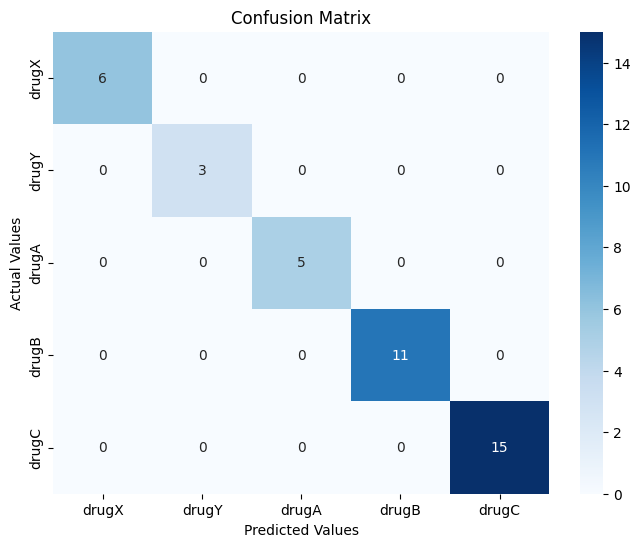

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['drugX', 'drugY', 'drugA','drugB','drugC'],
                     columns=['drugX', 'drugY', 'drugA','drugB','drugC'])

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')  # Use 'Blues' for blue colormap
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**Petroleum Consumption**

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/sample_data/petrol_consumption.csv')
display(df2.head())

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Shape of the DataFrame: (48, 5)

Missing values per column:
 Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

Data types of each column:
 Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

Descriptive statistics:
        Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Po

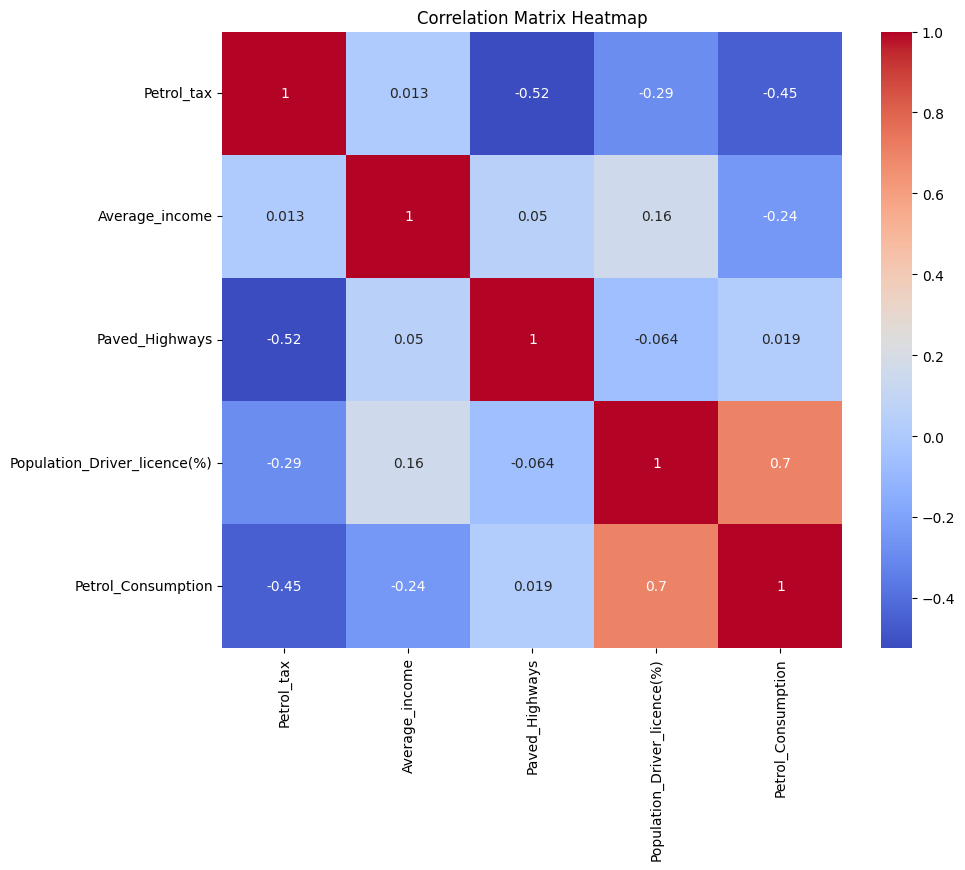

In [ ]:
print("Shape of the DataFrame:", df2.shape)

print("\nMissing values per column:\n", df2.isnull().sum())

print("\nData types of each column:\n", df2.dtypes)

print("\nDescriptive statistics:\n", df2.describe())

correlation_matrix = df2.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X2 = df2.drop('Petrol_Consumption', axis=1)
y2 = df2['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 94.3
Mean Squared Error (MSE): 17347.7
Root Mean Squared Error (RMSE): 131.7106677532234


In [ ]:
feature_importances = regressor.feature_importances_
feature_names = X2.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

,Feature,Importance
3,Population_Driver_licence(%),0.651569
1,Average_income,0.240522
0,Petrol_tax,0.065750
2,Paved_Highways,0.042160


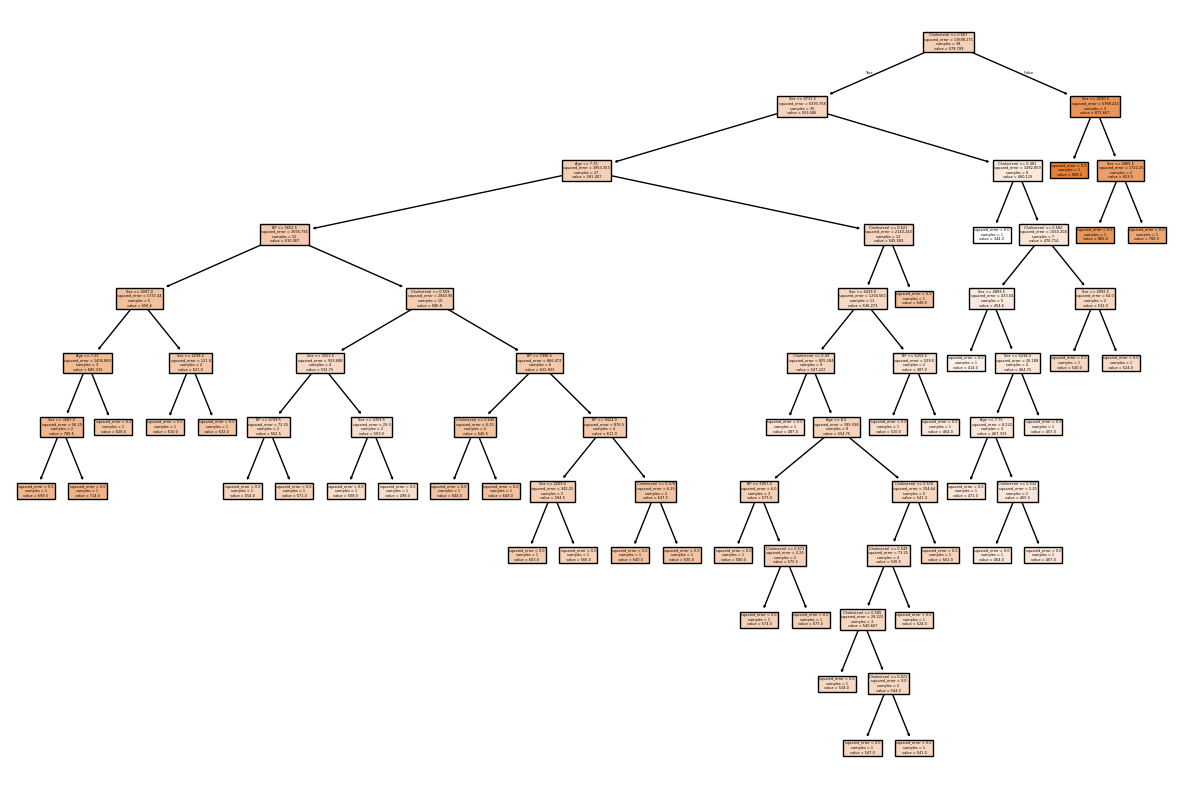

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

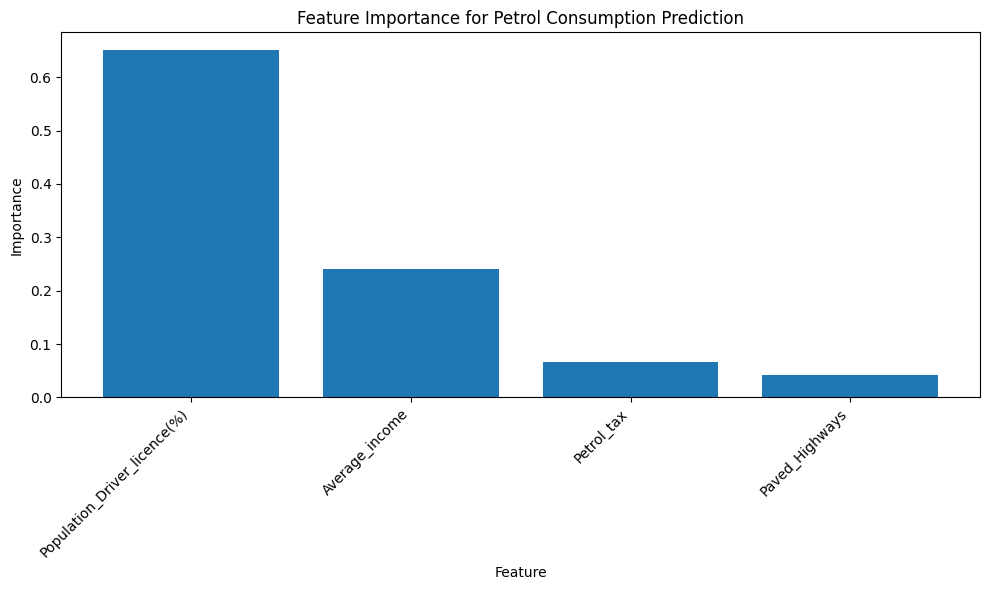

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = regressor.feature_importances_
feature_names = X2.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Petrol Consumption Prediction")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show